In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step

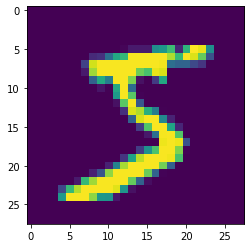

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [13]:
decoder = Sequential()
decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape(target_shape=(28,28)))


In [14]:
autoencoder = Sequential([encoder,decoder])

In [16]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])

In [17]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 139us/sample - loss: 7.4027 - accuracy: 0.4103 - val_loss: 7.3914 - val_accuracy: 0.4101

In [18]:
passed_images = autoencoder.predict(X_test[:10])

Original Image
Reconstruction


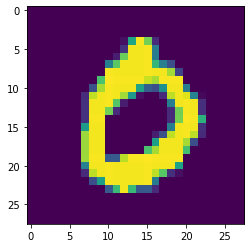

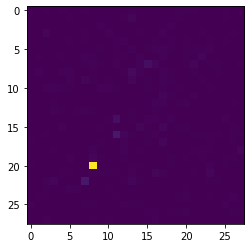

In [22]:
n = 3
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Reconstruction")
plt.imshow(passed_images[n])

In [23]:
from tensorflow.keras.layers import GaussianNoise

In [24]:
sample = GaussianNoise(0.2)

In [25]:
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original Image
Noisy Image
Reconstruction


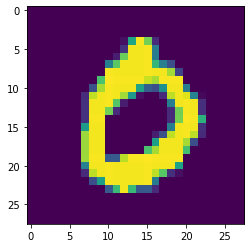

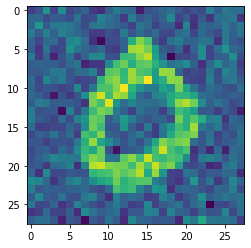

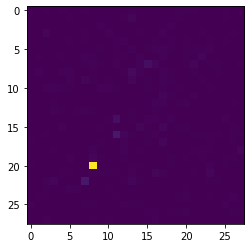

In [27]:
n = 3
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Noisy Image")
plt.imshow(noisey[n])
plt.show()
print("Reconstruction")
plt.imshow(passed_images[n])

In [28]:
import tensorflow as tf

In [29]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))



In [30]:
decoder = Sequential()
decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape(target_shape=(28,28)))

In [31]:
noise_remover = Sequential([encoder,decoder])


In [32]:
noise_remover.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])


In [33]:
noise_remover.fit(X_train,X_train,epochs=8,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2549 - accuracy: 0.7916 - val_loss: 0.2211 - val_accuracy: 0.7922

In [34]:
ten_noisy_imagess = sample(X_test[:10],training=True)

In [35]:
denoised = noise_remover(ten_noisy_imagess)

Original image
Noise added Image
After Noise Image


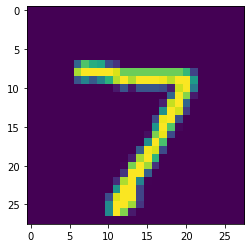

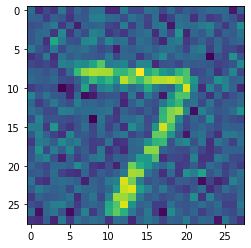

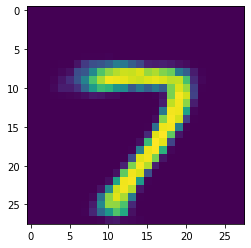

In [36]:
n=0
print("Original image")
plt.imshow(X_test[n])
plt.show()
print("Noise added Image")
plt.imshow(ten_noisy_imagess[n])
plt.show()
print("After Noise Image")
plt.imshow(denoised[n])
plt.show()
